# **Mössbauer parte2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

## **Muestra A:**

### *Abrimos el archivo:*

In [2]:
file=open("Archivo A.txt","r")  #abrimos el archivo para leer (r), COMO LOS NUMEROS TIENEN "," EN VEZ DE "." :

# COMO LOS NUMEROS TIENEN "," EN VEZ DE "." :


datos= open("datosA.txt","w+")             #creamos un archivo para escribir (w+) los datos con "."
for a in file:                          #type(a)=string
    b=a.replace(',', '.')               #hacemos que a los string con "," los reemplace por "."
    datos.write(b)                      #le decimos que escriba los strings b en en el nuevo archivo
datos.close()
data=np.loadtxt('datosA.txt',unpack=True)     #hacemos que nos lea los datos con "." como un vector
print(data.shape,type(data))
x=data.transpose()                         #como data es vector de 2 filas y 256 columnas lo trasponemos
data=pd.DataFrame(x)                       #lo convertimos en un dataframe



(2, 256) <class 'numpy.ndarray'>


### *Ploteamos:*

Text(0.5, 1.0, 'Muestra A')

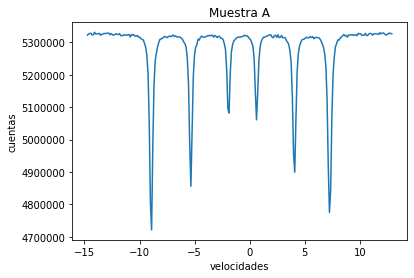

In [3]:

x=data.iloc[:,0]
y=data.iloc[:,1]

plt.plot(x,y)
plt.xlabel("velocidades")
plt.ylabel("cuentas")
plt.title("Muestra A")

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,0,1
0,-14.729,5322710.0
1,-14.621,5326360.0
2,-14.513,5327650.0
3,-14.405,5328250.0
4,-14.298,5323090.0
5,-14.190,5323870.0
6,-14.082,5331460.0
7,-13.974,5325860.0
8,-13.866,5326670.0
9,-13.759,5326880.0


### *A cada pico le hacemos un fit y ploteamos, para sacar su centro:*


fit que se usa:
\begin{equation}
    P(E)=\frac{(\frac{\Gamma}{2})^2}{(E-E_{o})^2+(\frac{\Gamma}{2})^2}
\end{equation}

### Pico 1

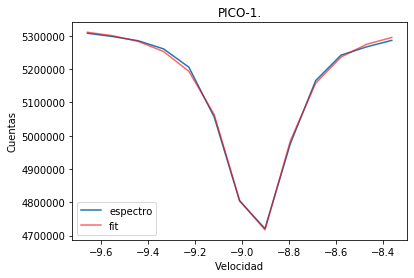

centro del pico = -8.937466328460442 ± 3.323450322577394e-06
El valor de la integral del pico es : -4729750.246569312


In [5]:
#PICO1, velocidades -9.61 :-8.29, filas 47:60


Pi1= data.iloc[47:60,]    #python no incluye el ultimo canal

x=Pi1.iloc[:,0]
y=Pi1.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, -9 , 1,95000])

plt.plot(Pi1.iloc[:,0],Pi1.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-1.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico 2

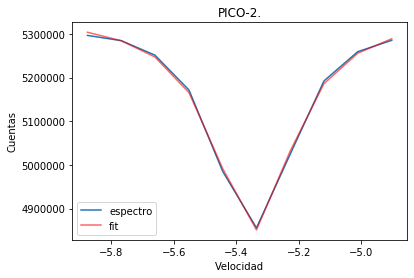

centro del pico = -5.34603355830633 ± 4.343808228520757e-06
El valor de la integral del pico es : -4736047.15773112


In [6]:
#PICO2, canales -5.82 :-4.82, filas 82:92

Pi2= data.iloc[82:92,]    #python no incluye el ultimo canal

x=Pi2.iloc[:,0]
y=Pi2.iloc[:,1]

def Lorentz(x, a, x0, b,c):    # a=altura, x0= centro, b=ancho, c=para levantarla
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, -5.3 , 1,95000])

plt.plot(Pi2.iloc[:,0],Pi2.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-2.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico 3

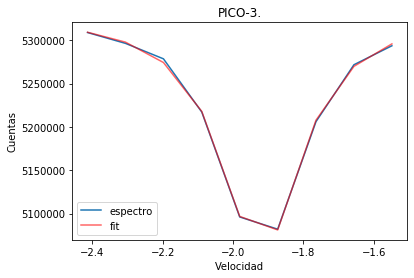

centro del pico = -1.9203912557661487 ± 1.5076712587768394e-06
El valor de la integral del pico es : 4323086.306130662


In [7]:
#PICO3, canales -2.39 : -1.39, filas 114:123

Pi3= data.iloc[114:123,]    #python no incluye el ultimo canal

x=Pi3.iloc[:,0]
y=Pi3.iloc[:,1]

def Lorentz(x, a, x0, b,c):    # a=altura, x0= centro, b=ancho, c=para levantarla
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, -2.3 , 1,95000])

plt.plot(Pi3.iloc[:,0],Pi3.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-3.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)


### Pico 4

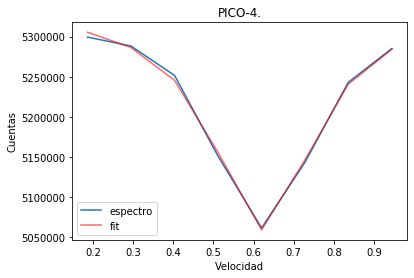

centro del pico = 0.6238211151140949 ± 8.937794974188418e-06
El valor de la integral del pico es : 4810243.105821316


In [8]:
#PICO4, canales 0.11 : 1.08, filas 138:146

Pi4= data.iloc[138:146,]    #python no incluye el ultimo canal

x=Pi4.iloc[:,0]
y=Pi4.iloc[:,1]

def Lorentz(x, a, x0, b,c):    # a=altura, x0= centro, b=ancho, c=para levantarla
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, 0.58 , 0.2,95000])

plt.plot(Pi4.iloc[:,0],Pi4.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-4.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)


### Pico 5

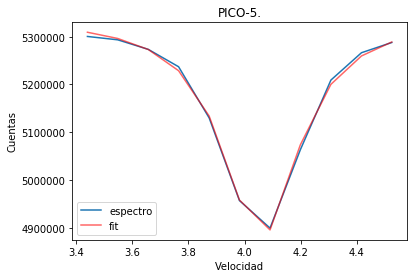

centro del pico = 4.057690544703707 ± 6.303784685062706e-06
El valor de la integral del pico es : 5085100.245208277


In [9]:
# PICO5, canales 3.45 : 4.62, filas 168:179


Pi5= data.iloc[168:179,]    #python no incluye el ultimo canal

x=Pi5.iloc[:,0]
y=Pi5.iloc[:,1]

def Lorentz(x, a, x0, b,c):    # a=altura, x0= centro, b=ancho, c=para levantarla
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, 4.1 , 0.2,95000])

plt.plot(Pi5.iloc[:,0],Pi5.iloc[:,1],label="espectro")   
plt.title("PICO-5.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico 6

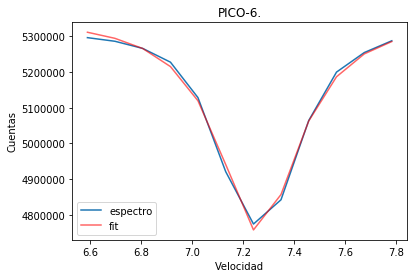

centro del pico = 7.261114989620483 ± 1.4713921696388026e-05
El valor de la integral del pico es : 5852635.321031186


In [10]:
# PICO6, canales 6.55 : 7.91, filas 197:209

Pi6= data.iloc[197:209,]    #python no incluye el ultimo canal

x=Pi6.iloc[:,0]
y=Pi6.iloc[:,1]

def Lorentz(x, a, x0, b,c):    # a=altura, x0= centro, b=ancho, c=para levantarla
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[4700000, 7.2 , 0.2,95000])

plt.plot(Pi6.iloc[:,0],Pi6.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-6.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)



## **Muestra B:**



### *Abrimos el archivo:*

In [11]:
file=open("Archivo B.txt","r")

datos= open("datosB.txt","w+")            
for a in file:                          
    b=a.replace(',', '.')             
    datos.write(b)                      
datos.close()
data=np.loadtxt('datosB.txt',unpack=True)     
print(data.shape,type(data))
x=data.transpose()                         
data=pd.DataFrame(x)                    


(2, 256) <class 'numpy.ndarray'>


### *Ploteamos:*

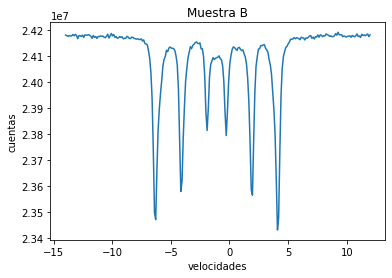

In [12]:

x=data.iloc[:,0]
y=data.iloc[:,1]

plt.plot(x,y)
plt.xlabel("velocidades")
plt.ylabel("cuentas")
plt.title("Muestra B")
plt.show()

### *A cada pico le hacemos un fit y ploteamos, para sacar su centro:*


fit que se usa:
\begin{equation}
    P(E)=\frac{(\frac{\Gamma}{2})^2}{(E-E_{o})^2+(\frac{\Gamma}{2})^2}
\end{equation}

### Pico1:

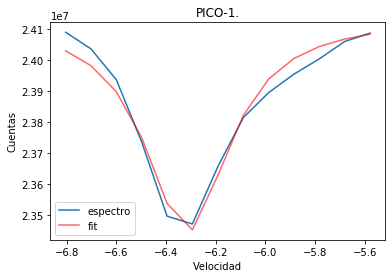

centro del pico = -6.314880066385802 ± 0.00010950969481667982
El valor de la integral del pico es : 29410828.530017067


In [13]:
# Pico1, velocidades -6.82,-5.45, canales 70:83

Pi1= data.iloc[70:83,]    #python no incluye el ultimo canal

x=Pi1.iloc[:,0]
y=Pi1.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, -6.3, 0.3,950000])

plt.plot(Pi1.iloc[:,0],Pi1.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-1.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico2:

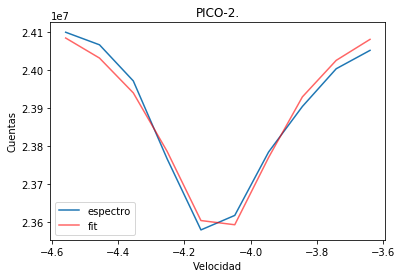

centro del pico = -4.094616115266576 ± 7.315387823992818e-05
El valor de la integral del pico es : 30687931.60187962


In [14]:
#Pico2, velocidades  -4.60, -3. 50, canales 92:102

Pi2= data.iloc[92:102,]    #python no incluye el ultimo canal

x=Pi2.iloc[:,0]
y=Pi2.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, -4, 0.3,950000])

plt.plot(Pi2.iloc[:,0],Pi2.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-2.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico3:

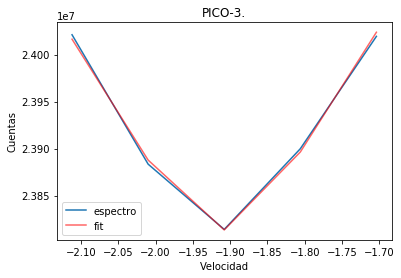

centro del pico = -1.9113619829735298 ± 1.2877817016291354e-05
El valor de la integral del pico es : 32096551.137551278


In [15]:
#Pico3, velocidades  -2.15, -1.62, canales 116:121

Pi3= data.iloc[116:121,]    #python no incluye el ultimo canal

x=Pi3.iloc[:,0]
y=Pi3.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, -1.8, 0.3,950000])

plt.plot(Pi3.iloc[:,0],Pi3.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-3.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico4:

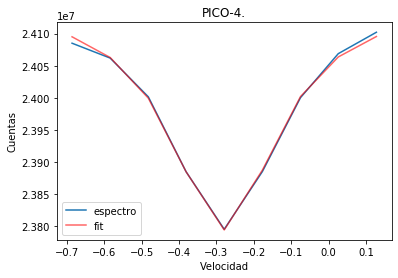

centro del pico = -0.2799602893990414 ± 6.744445884421518e-06
El valor de la integral del pico es : 24874567.10462756


In [16]:
#Pico4 ,velocidades -0.65:0.035, canales 130:137

Pi4= data.iloc[130:139,]    #python no incluye el ultimo canal

x=Pi4.iloc[:,0]
y=Pi4.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, -0.3, 0.3,950000])

plt.plot(Pi4.iloc[:,0],Pi4.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-4.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico5:

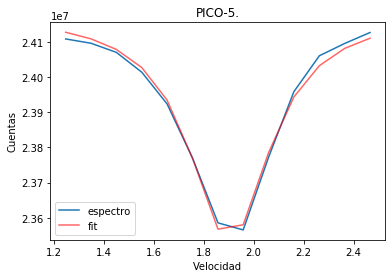

centro del pico = 1.903352173179176 ± 2.0669073563195986e-05
El valor de la integral del pico es : 28089165.16083235


In [17]:
#Pico5 ,velocidades 1.21 : 2.39, canales 149:160

Pi5= data.iloc[149:162,]    #python no incluye el ultimo canal

x=Pi5.iloc[:,0]
y=Pi5.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, 1.6, 0.3,950000])

plt.plot(Pi5.iloc[:,0],Pi5.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-5.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)

### Pico6:

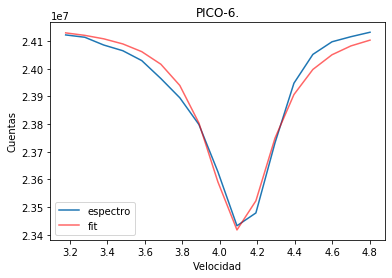

centro del pico = 4.105705286719157 ± 7.212682312905642e-05
El valor de la integral del pico es : 30041057.421545547


In [19]:
#Pico6 , velocidades 3.18 : 4.71 , canales 168:183

Pi6= data.iloc[168:185,]    #python no incluye el ultimo canal

x=Pi6.iloc[:,0]
y=Pi6.iloc[:,1]

def Lorentz(x, a, x0, b,c):    #a=altura*5, x0
    return -a * b**2 / ((x-x0)**2 + b**2) +c

popt,pcov = curve_fit(Lorentz, x, y, p0=[2350000, 4, 0.3,950000])

plt.plot(Pi6.iloc[:,0],Pi6.iloc[:,1],label="espectro")    #doy vuelta el pico poniendo valor -y
plt.title("PICO-6.")
plt.plot(x, Lorentz(x, *popt), 'r-', label='fit',alpha=0.6)
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Cuentas')
plt.show()

print("centro del pico = "+str(popt[1])+" ± "+str(pcov[1,1]))

#INTEGRAMOS EL PICO
    
def integrand(x,c,d):
    return Lorentz(x,popt[0],popt[1],popt[2],popt[3])
c = popt[1]-3*popt[2]
d = popt[1]+3*popt[2]
I = quad(integrand, popt[1]-3*popt[2], popt[1]+3*popt[2],args=(c,d))
# print(I) 
k=I[0]
print("El valor de la integral del pico es :",k)